<a href="https://colab.research.google.com/github/Ning-better-and-better/Introduction-to-Git-and-GitHub/blob/master/CS7641_ML_Proj_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
log_templates = files.upload()

Saving lcsmap.csv to lcsmap.csv


In [86]:
import pandas as pd
df = pd.read_csv('lcsmap.csv').drop(columns=[' Average Pattern Length',
       ' Last Pattern', ' Has Computed Document Frequency Ratio',
       ' Document Frequency Ratio'])

In [149]:
df.head()

,Pattern,Number of Matches,Cluster
0,INFO * Registered signal handlers for TERM HUP...,786,4
1,INFO * SecurityManager Changing * acls yarn *,3004,4
2,INFO * SecurityManager SecurityManager authent...,1486,4
3,INFO * Slf4jLogger Slf4jLogger started,724,4
4,INFO Remoting Starting remoting,724,4


In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Pattern'])
vectorizer1 = CountVectorizer()
X1 = vectorizer1.fit_transform(df['Pattern'])
X = X1

In [197]:
print(X[0])

  (0, 1509)	1
  (0, 2038)	1
  (0, 2234)	1
  (0, 1442)	1
  (0, 1365)	1
  (0, 2406)	1
  (0, 1482)	1
  (0, 1537)	1


In [200]:
vectorizer.get_feature_names_out()

array(['0012job', '04dn8iq', '0distance', ..., 'zero', 'zip', 'zones'],
      dtype=object)

In [201]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

s_score, db_index = [], []

for k in range(2, 30):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(X)
  clusters = km.labels_
  s_score.append(metrics.silhouette_score(X, clusters, metric='euclidean'))
  db_index.append(metrics.davies_bouldin_score(X.toarray(), clusters))

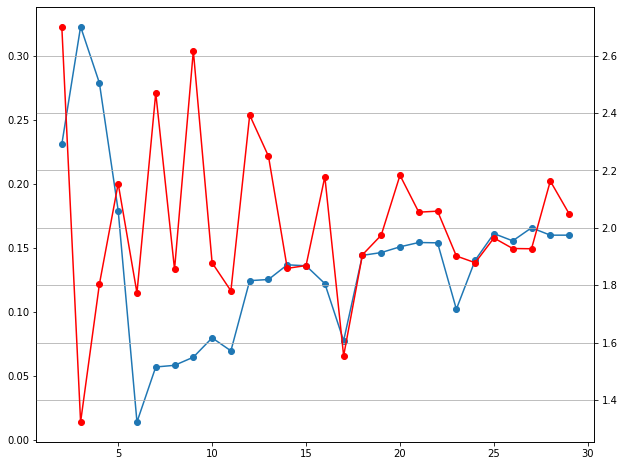

In [202]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(list(range(2,30)), s_score, 'o-')
ax2.plot(list(range(2,30)), db_index, 'ro-')
plt.xlabel('k value')
plt.grid()
plt.show()

In [227]:
from numpy import linspace
s_score, db_index, db_eps = [], [], []

for e in linspace(1, 11, 21):
  print(e)
  db = DBSCAN(eps=e, min_samples=10).fit(X)
  clusters = db.labels_
  db_eps.append(e)
  s_score.append(metrics.silhouette_score(X, clusters, metric='euclidean'))
  db_index.append(metrics.davies_bouldin_score(X.toarray(), clusters))

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0


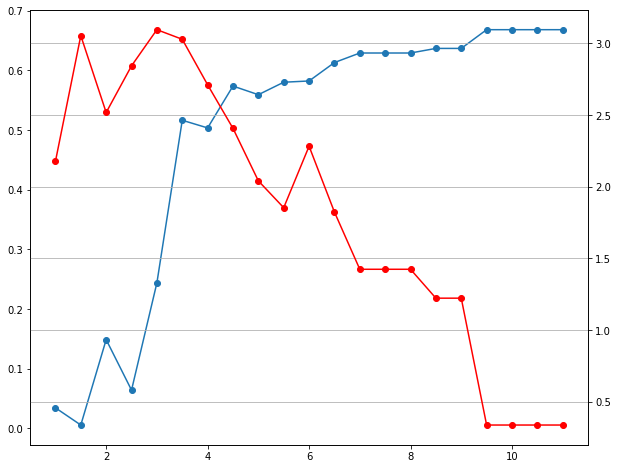

In [228]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(db_eps, s_score, 'o-')
ax2.plot(db_eps, db_index, 'ro-')
plt.grid()
plt.show()

In [230]:
db_index

[2.176920519686506,
 3.053704827557199,
 2.517726538335262,
 2.8432564357841392,
 3.09537952129635,
 3.0284374293054963,
 2.7109833012625884,
 2.4071503604868534,
 2.0409543163046613,
 1.8536378290833746,
 2.2824098826234103,
 1.8234452192198873,
 1.4241606111806946,
 1.4241606111806946,
 1.4241606111806946,
 1.2225869563254246,
 1.2225869563254246,
 0.337679428065604,
 0.337679428065604,
 0.337679428065604,
 0.337679428065604]

In [222]:
from sklearn.mixture import GaussianMixture

s_score, db_index = [], []

for k in range(2, 5):
  print(k)
  gmm = GaussianMixture(n_components=k, init_params='k-means++', max_iter=100, n_init=1).fit(X.toarray())
  clusters = gmm.predict(X.toarray())
  s_score.append(metrics.silhouette_score(X, clusters, metric='euclidean'))
  db_index.append(metrics.davies_bouldin_score(X.toarray(), clusters))

k = list(range(2, 5))

2
3
4


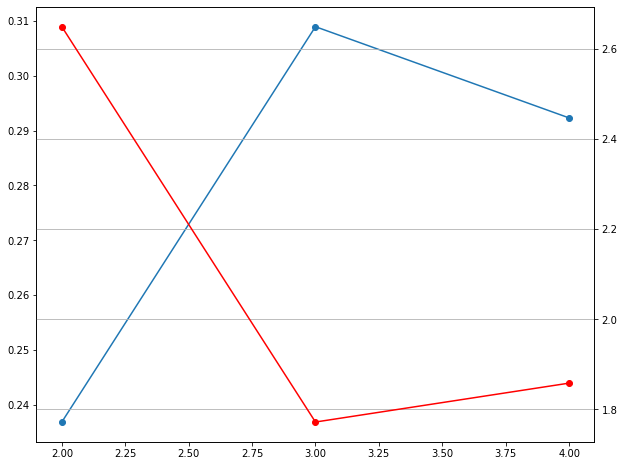

In [225]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(k, s_score, 'o-')
ax2.plot(k, db_index, 'ro-')
plt.xlabel('k value')
plt.grid()
plt.show()